$\def\com#1{\color{blue}{\textrm{#1}}}$
$\com{Marker's comments will appear like this}$

$$
\def\I{{\rm i}}
\def\qq{\qquad\qquad}
\def\qfor{\qquad\hbox{for}\qquad}
\def\qwhere{\qquad\hbox{where}\qquad}
\def\ale#1{\begin{align}#1\end{align}}
\def\em{\epsilon_m}
\def\unit#1{{\rm #1}}
\def\com#1{\color{blue}{\textrm{#1}}}
\def\coms#1{\color{blue}{#1}}
$$
# PHSI 365: Computational Physics 
Dr. Ashton Bradley
<br>
Room 416
<br>
ashton.bradley@otago.ac.nz
<br>

# Laboratory 3
In this lab we begin our study of time evolution in physical systems.

# The laser
We start our study of dynamical systems using a simple model of the laser, one of the most important technologies of the modern era. 

We will consider a [solid-state laser](https://en.wikipedia.org/wiki/Solid-state_laser) which consists of an assembly of special (optically reactive at the right energy) atoms embedded in a solid state matrix. The matrix material is enclosed by a pair of opposing partially reflecting mirrors to create an optical cavity. 

An external energy source is used to **pump** the atoms out of their ground state. 

The laser exhibits a special property: as the pump power is increased, it reaches a **lasing threshold**, and above this critical pump strength, the laser emmits highly organized coherent light, resulting from the stimulated emission of photons into the same mode of the optical cavity.

We will model the laser using a pair of rate equations. We have two variables describing the laser light building up in the system due to the pump:

- $N(t)$ is the number of excited atoms
- $n(t)$ is the number of photons in the laser cavity mode

Our laser model then consists of the pair of ordinary differential equations

<div class="alert alert-block alert-warning">
<font color=blue>
$$\ale{
\frac{dn}{dt}&=\gamma nN-\kappa n\\
\frac{dN}{dt}&=-\gamma nN -\lambda N + P
}$$
</font>
</div>

where 

- $\gamma$ is the gain coefficient for **stimulated emission** into the cavity. This is the coherent process that creates laser light.
- $\kappa$ is the decay rate due to loss of photons through the mirror, scattering, etc.
- $\lambda$ is the decay rate for atoms to **spontaneously emit** a photon.
- $P$ is the pump strength. 

All parameters are positive. As simple as this model appears (just a modified Lotka-Volterra model), it is quite predictive.

# Steady state
We can solve for the steady state rather naively to find

$$\ale{
\bar N&=\frac{\kappa}{\gamma}\\
\bar n&= \frac{P}{\kappa}-\frac{\lambda}{\gamma}
}$$
and we should ask for what parameters such equations have meaningful solutions.
## Threshold for the lasing transition
We immediately see that since $\bar n\geq 0$, the steady state solution for finite $\bar n$ only exists when

$$P > P_c\equiv\frac{\lambda\kappa}{\gamma}. $$

Considering the solution when $P<P_c$, we should expect a transition from a state with no photons in the laser mode, $\bar n_0\equiv 0$, $\bar N=P/\lambda$ for $P\leq P_c$, to a lasing mode of operation with finite photon population in the cavity when $P>P_c$, given by the steady state expressions above.

Physically, we see that the pumping strength should be high enough to overcome spontaneous emission and cavity losses. Below threshold the mean photon number in the cavity mode is zero, and the excited atoms $\bar N$ lose their energy through spontanous emission into other optical modes, with rate $\lambda$.

# Stability
We can ask about the stability of the two steady state solutions, above and below threshold.

## A. Below threshold
1. Linearise the equations of motion around the steady state below threshold. Show that for $P<P_c$ this solution is stable. **For the state to be stable, perturbations cannot grow with time; at worst they can oscillate around the steady state solution.**
1. Show that this solution becomes unstable when $P$ exceeds $P_c$.
1. Choose some nominal values of $\gamma,\kappa,\lambda$ (for simplicity you can choose them all to be of order 1, but to keep things interesting, make them all different), and solve the equations of motion numerically, and verify that the sub-threshold steady state you predict is, in fact, a steady state when $P<P_c$. Use the julia package `DifferentialEquations.jl` to do this, as described in **lecture 6**.

## B. Above threshold
Linearising around the steady state, we write $n(t)\equiv\bar n+\delta (t), N(t)\equiv\bar N+\epsilon(t)$, and EOM becomes

$$\ale{
\frac{d\delta}{dt}&=\gamma\bar n\epsilon\\
\frac{d\epsilon}{dt}&=-\kappa\delta-\frac{P\gamma}{\kappa}\epsilon
}$$

When $P>P_c$, notice that we can differentiate the equations of motion again with respect to time, and use the steady state solution where possible to eliminate terms. 
1. Show that the equations of motion for $\delta$ and $\epsilon$ decouple into two independent equations of motion describing damped simple harmonic motion. \[A sanity check for your equations is that the damping and frequency parameters will be identical for both of them \].
1. Rewrite the damping rate and oscillation frequency in terms of $P_c$. Interpret your result.
1. Plot the stable steady state solution for $\bar n$ as a function of $P/P_c$ over the interval $P\in[0,2)$.
1. Solve the equations of motion numerically just below and just above threshold. Verify that if you start the laser **near** (why near?) the sub-threshold steady state solution, but allow it to evolve in time for pumping **above threshold** $P>P_c$, it quickly switches to the stable solution corresponding to lasing.
1. There is a second transition of sorts, where the laser operation becomes overdamped and the photon number $\bar n$ stabilises to a very well defined value. Locate the value of pump power $P$ where linear fluctuations become **critically damped**. 

\[**Hint:** You will need to solve the linearised equations of motion assuming $\delta\sim e^{rt}$, and solve the characteristic equation for $r$ to locate the regimes of underdamped, critically damped, and overdamped operation.\]

## Answers for A

1. First of all we let $n = \bar n + \delta$ and $N = \bar N + \epsilon$, where $\epsilon$ and $\delta$ are small perturbations and $\bar n$ and $\bar N$ are n and N at the steady states. Now we can plug these into the equations.

$$\frac{d \delta}{dt} = \gamma(\bar n + \delta)(\bar N + \epsilon) - \kappa(\bar n + \delta)$$

$$\frac{d \epsilon}{dt} = - \gamma(\bar n + \delta)(\bar N + \epsilon) - \lambda(\bar N + \epsilon) + P$$

Now expanding the terms in the first equation

$$\frac{d \delta}{dt} = \gamma(\bar n \bar N + \bar n \epsilon + \delta \bar N + \epsilon \delta) - \kappa(\bar n + \delta)$$

The $\epsilon \delta$ term goes away as it is quadratic in its perturbation.

So we are left with $$\frac{d \delta}{dt} = \gamma(\bar n \bar N + \bar n \epsilon + \delta \bar N) - \kappa(\bar n + \delta)$$

But we know from the stationary states, 

$$\gamma \bar n \bar N - \kappa \bar n = 0$$
$$-\gamma \bar n \bar N - \lambda \bar N + P = 0$$

so we can eliminate the $\gamma \bar n \bar N - \kappa \bar n$ term from the equation as we know it is zero, leaving us with 

$$\frac{d \delta}{dt} = \gamma(\bar n \epsilon + \delta \bar N) - \kappa\delta$$

From above we also know that $\bar n = 0$ and $\bar N = \frac{P}{\lambda}$

We can plug these in and we get $$\frac{d\delta}{dt} = \frac{\gamma \delta P}{\lambda} - \kappa \delta$$


Likewise for the other equation, 

$$\frac{d \epsilon}{dt} = -\gamma(\bar n \bar N + \bar n \epsilon + \delta N) - \lambda(\bar N + \epsilon) + P$$

However from before we know that $$-\gamma \bar n \bar N - \lambda \bar N + P = 0$$

So we can now reduce it to $$\frac{d \epsilon}{dt} = -\gamma(\bar n \epsilon + \delta N) - \lambda\epsilon$$

As before, $\bar n $ = 0 and $\bar N = \frac{P}{\lambda}$. Plugging these in we get finally both equations

$$\frac{d \epsilon}{dt} = \frac{- \gamma \delta P}{\lambda} - \lambda \epsilon$$

$$\frac{d\delta}{dt} = \frac{\gamma \delta P}{\lambda} - \kappa \delta$$

How do we know that these are always decreasing? Well let us set $P = P_c - \Delta$, i.e P is slightly smaller than $P_C$. Remember that $P_c = \frac{\lambda \kappa}{\gamma}$.

For the first equation we get $$\frac{d \epsilon}{dt} = - \Delta \delta$$ This tells us that when P is less than P_c, the perturbation will exponentially decay proportional to $$\delta = e^{- \Delta t}$$

We do not need to substitute into the $\frac{d \epsilon}{dt}$ equation as both terms are negative we know for sure the perturbation will decay over time.

$\com{delta and epsilon aren't necessarily positive. It's more that delta decays,}$<br>$\com{and the epsilon equation after delta has decayed also gives decay.}$

2. When $P > P_c$, we can substitute into the $\delta$ equation again. This time we get $$\delta = e^{\Delta \delta t}$$ So the $\delta$ perturbation blows up exponentially, thus the solution becomes unstable.


$\com{Good. You should use \\propto instead of = in the two equations for delta, as these are missing an initial condition.}$

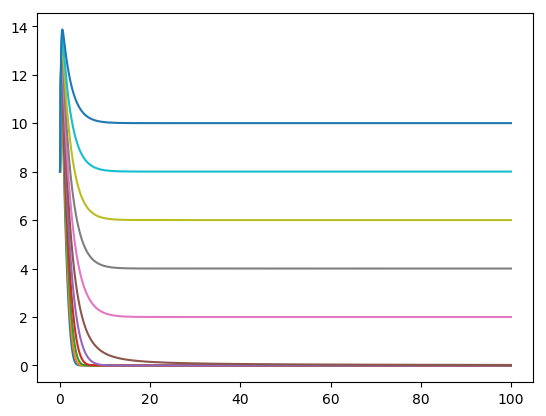

In [1]:
#Question A3
using DifferentialEquations, PyPlot

#solve the coupled laser equation numerically.. for loop gives us a spectrum of results
for i = -5:5
γ = 0.5
κ = 0.5
λ = 0.5
P = (λ * κ)/(γ) + i#making P slightly greater/smaller than P_c

function laser(du,u,p,t)
	du[1] = γ*u[1]*u[2] - κ*u[1]
    du[2] = -γ*u[1]*u[2] - λ*u[2] + P
end

tspan = (0.0,100.0)
t = collect(0:0.01:100)
u0 = [8.0,8.0]
    
    
prob = ODEProblem(laser,u0,tspan)
sol = solve(prob,saveat=t)
plot(t,sol[1,:])
#plot(t,sol[2,:])
show()
end

As you can see only the positive values converge to higher stable states. The lower values converge to the sub threshold steady state sink.
$\com{I can only see it, since I already know what's happening. An unlabelled graph with lots of lines isn't much use most of the time.}$<br>$\com{(You should label it, and give it a legend).}$

## Answers for B
1.
We want to show that these equations decouple.. first looking at $\frac{d \delta}{dt} = \gamma \bar n \epsilon$. When we take the derivative with respect to time, we get $$\frac{d^2 \delta}{d t^2} = \gamma \bar n (- \kappa \delta - \frac{P \epsilon \gamma}{\kappa})$$ We have subbed in $\frac{d \epsilon}{dt}$. Now we also know $\epsilon = \frac{d \gamma}{dt} \frac{1}{\gamma \bar n}\com{ careful to write things correctly}$, so we can go ahead and sub that in. Rearranging, we get the equation for a damped harmonic oscillator;

$$\frac{d^2 \delta}{d t^2} = -\frac{P \gamma}{\kappa} \frac{d \delta}{dt} - \gamma  \kappa \delta (\frac{P}{\kappa} - \frac{\lambda}{\gamma})$$

We have plugged in the value for $\bar n$. We can simplify this

$$\frac{d^2 \delta}{d t^2} = -\frac{P \gamma}{\kappa} \frac{d \delta}{dt}  - \delta(P \gamma - \lambda \kappa)$$

So it is shown for delta. Now we will do it for epsilon..

By the same process we get an equation for the second derivative of epsilon,
$$\frac{d^2 \epsilon}{dt^2} = \frac{-P \gamma}{\kappa} \frac{d \epsilon}{dt} - (P \gamma - \lambda \kappa)\epsilon$$

Which is also the equation for the damped harmonic oscillator. They pass the sanity check as well. They are oscillating identically.

2.

For a damped harmonic oscillator, 

$$m \frac{d^2 x}{d t^2} = -b \frac{dx}{dt} - kx$$

The damping coefficent, $\beta = b/2m$. m for us is 1 so $\beta = b/2 = \frac{P \gamma}{2 \kappa}$. Now the oscillation frequency $\omega = \sqrt{k/m}$, so ours is 
$\omega = \sqrt{P \gamma - \lambda \kappa}$. We want to rewrite these in terms of $P_c$. First doing $\beta$, we get $\beta = \frac{\lambda P }{2 P_C}\com{ good}$. For $\omega$ we get $$\omega = \sqrt{\frac{1}{P_c}(\lambda \kappa P - \frac{\kappa^2 \lambda^2}{\gamma})} \com{ This can be rearranged into a nicer form}$$

If we sub in $P = P_C$, we get $\beta = \frac{\lambda}{2}$ and $\omega = 0$. This makes sense because at the stable point there should be no oscillation. 

3.

We can rearrange above equations to find $\bar n = (\frac{P}{P_C} - 1)\frac{\lambda}{\gamma}$. We can set lambda, gamma and kappa and plot for a range of P's...

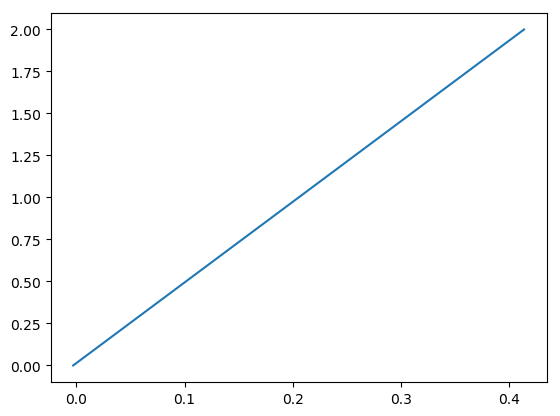

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee1f70e210>

In [2]:
#Question B, part 3
using PyPlot

γ = 20
κ = 4.8
λ = 0.06
Pc = (λ*κ)/γ
P = collect(0:2)
nbar = (P/Pc - 1)*(λ/γ)
plot(nbar,P)

#As you can see, as P increases, so does nbar. It is a linear relationship

$\com{Where is the transition to lasing? Also please label graphs.}$

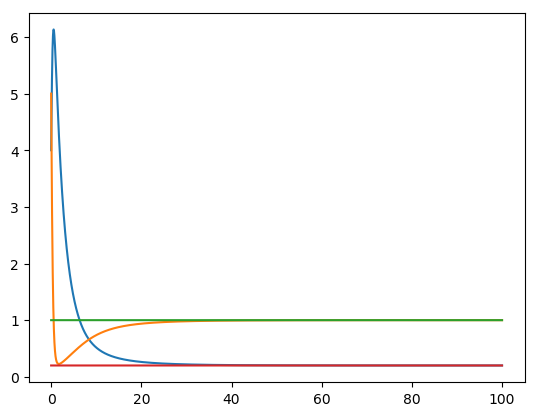

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee1f3a28d0>

In [7]:
#Question B4.. plotting above threshold..
using DifferentialEquations, PyPlot

#solve the coupled laser equation numerically
γ = 0.5
κ = 0.5
λ = 0.5
Pabove = (λ * κ)/(γ) + 0.1 #making P slightly greater than P_c

function laser_above(du,u,p,t)
	du[1] = γ*u[1]*u[2] - κ*u[1]
    du[2] = -γ*u[1]*u[2] - λ*u[2] + Pabove
end

tspan = (0.0,100.0)
t = collect(0:0.01:100)
nbar_s = Pabove/κ - λ/γ
Nbar_s = κ/γ
u0 = [4.0,5.0]
    
prob = ODEProblem(laser_above,u0,tspan)
sol = solve(prob,saveat=t)
plot(t,sol[1,:])
plot(t,sol[2,:])
plot(t,Nbar_s*ones(size(t)))
plot(t,nbar_s*ones(size(t)))

$\com{Code doesn't work}$

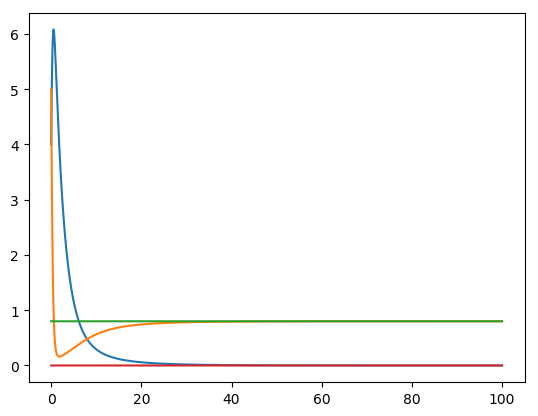

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fee1f4d0b90>

In [5]:
#now plotting below threshold...

#solve the coupled laser equation numerically..
γ = 0.5
κ = 0.5
λ = 0.5
Pbelow = (λ * κ)/(γ) - 0.1 #making P slightly less than Pc
function laser_below(du,u,p,t)
	du[1] = γ*u[1]*u[2] - κ*u[1]
    du[2] = -γ*u[1]*u[2] - λ*u[2] + Pbelow
end
tspan = (0.0,100.0)
t = collect(0:0.01:100)
nbar_s = 0
Nbar_s = Pbelow/λ
u0 = [4.0,5.0]
prob = ODEProblem(laser_below,u0,tspan)
sol = solve(prob,saveat=t)
plot(t,sol[1,:])
plot(t,sol[2,:])
plot(t,Nbar_s*ones(size(t)))
plot(t,nbar_s*ones(size(t)))


$\com{Good, but where are your plot labels?}$

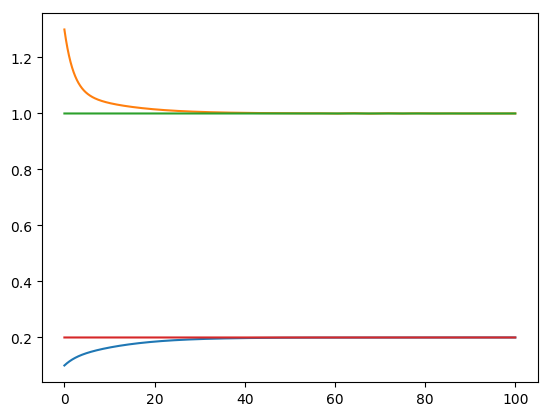

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb3434cbe48>

In [5]:
#Question B4
using DifferentialEquations, PyPlot

#solve the coupled laser equation numerically.. for loop gives us a spectrum of results
γ = 0.5
κ = 0.5
λ = 0.5
P = (λ * κ)/(γ) + 0.1 #making P slightly greater than P_c

function laser(du,u,p,t)
	du[1] = γ*u[1]*u[2] - κ*u[1]
    du[2] = -γ*u[1]*u[2] - λ*u[2] + P
end

tspan = (0.0,100.0)
t = collect(0:0.01:100)
nbar_s = P/κ - λ/γ
Nbar_s = κ/γ
u0_below = [nbar_s,Nbar_s - 0.1]
u0_above = [nbar_s + 0.1,Nbar_s + 0.1]
u0_thresh = [0+0.1,P/λ+0.1]

prob = ODEProblem(laser,u0_thresh,tspan)
sol = solve(prob,saveat=t)
plot(t,sol[1,:])
plot(t,sol[2,:])
plot(t,Nbar_s*ones(size(t)))
plot(t,nbar_s*ones(size(t)))

$\com{Is this really started near the sub-threshold solution?}$

4.
Continued... looking at the first graph we can see that the ones above threshold converge to the higher steady state. The ones below threshold converge to the lower steady state where $\bar n = 0$

Looking at the second graph we can see what happens when input a value near the sub threshold as a u0, but allow it to evolve in time as if P>Pc.. the solutions still converge to the stable solution for lasing where $\bar n$ is nonzero

5.
Critical damping occurs when the damping coefficent is equal to the undamped resonant frequency of the oscillator. As given in the hint above, we "will need to solve the linearised equations of motion assuming  δ∼ertδ∼ert , and solve the characteristic equation for  r  to locate the regimes of underdamped, critically damped, and overdamped operation."

Well first of all our equation takes the form $m\frac{d^2x}{dt^2} + \beta \frac{dx}{dt} + kx = 0$. We assume that our x takes the form of $e^{rt}$. plugging this back in and taking away the factor of $e^{rt}$ common to all elements we get the characteristic equation for the roots; $mr^2 + \beta r + k = 0$. We can solve this using the quadratic formula to get $$r = \frac{-\beta \pm \sqrt{\beta^2 - 4mk}}{2m}$$

Now we will look at the different damping regimes.. when $\beta^2 = 4mk$ it will be critically damped. Our m is 1 so this means that $\beta^2 = 4k$ So we get an equation for P, $$P^2 - \frac{4\kappa^2}{\gamma} P + \frac{4\lambda^3\kappa^3}{\gamma^2} = 0$$

Which will give different roots depending on the values given for the laser parameters obviously. We can still solve this for P using the quadratic formula.. we get

$$P = 2(\frac{\sqrt{\kappa^2 - \kappa^3\lambda^2}}{\gamma} \pm \frac{\kappa}{\gamma})$$



$\coms{\textrm{The }\pm\textrm{ should be with the }\sqrt{\cdot}\textrm{ term.}}$

$\com{Total: 13/15}$